In [301]:
import pandas as pd
import re
%matplotlib inline

In [302]:
data2006 = pd.read_csv("Pandas_Results2006.csv", index_col = 0) 
data2009 = pd.read_csv("Pandas_Results2009.csv", index_col = 0)
data2015 = pd.read_csv("Pandas_Results2015.csv", index_col = 0) 
data2018 = pd.read_csv("Pandas_Results2018.csv", index_col = 0)

In [303]:
df_total = pd.concat([data2006, data2009, data2015, data2018], ignore_index = True)

In [304]:
df_total.round(2)

,jahr,name,zufr,vorb_f,vorb_p,prob,urt,zus,konf
0,2006,Büelrain,4.82,4.18,4.07,4.28,4.20,4.15,3.74
1,2006,Enge,4.75,4.07,3.93,4.49,4.44,3.99,3.76
2,2006,Freudenberg,4.32,4.00,3.87,4.53,4.66,4.08,3.84
3,2006,Glattal,4.83,3.94,4.12,4.50,4.33,3.72,3.44
4,2006,Hohe Promenade,5.09,4.76,4.64,4.71,4.71,4.00,4.00
...,...,...,...,...,...,...,...,...,...
80,2018,Wiedikon,4.90,4.30,4.70,4.50,4.50,4.80,4.20
81,2018,Kuesnacht,4.70,3.60,4.80,4.50,4.90,4.80,4.30
82,2018,Liceo Artistico,4.80,4.10,5.40,4.50,4.40,5.10,4.40
83,2018,MNG,5.20,4.90,4.70,4.40,4.40,4.50,4.10


Das Problem: Nur acht Schulen haben immer die gleichen Namen, den Rest muss man noch umbenennen/vereinheitlichen

In [305]:
df_total["name"].value_counts().head(30)

Stadelhofen                      4
Hottingen                        4
Rychenberg                       4
KME                              4
Liceo Artistico                  4
Wiedikon                         4
Limmattal                        4
Freudenberg                      4
Hohe Promenade                   3
Enge                             3
Oerlikon                         2
Zürcher Oberland                 2
Büelrain                         2
Zürcher Unterland                2
Rämibühl RG                      2
Küsnacht                         2
Uster                            2
Glattal                          2
Kuesnacht                        2
KZO                              2
im Lee                           2
Im Lee                           2
Rämibühl LG                      2
Zürich Birch                     2
Rämibühl MNG                     2
MNG Raemibuehl                   1
KEN                              1
Freies Gymnasium Zürich          1
Literaturgymnasium R

Enge: 1x KEN
Hohe Promenade: 1x KSHP
Im Lee: 2x im Lee
Zürcher Oberland: 2x KZO
Büelrain = 1 x Buelrain
Zürcher Unterland: 1 x KZU, 1x Zuercher Unterland
Rämibühl MNG: 1x MNG, 1x MNG Raemibuehl
Rämibühl LG: 1x LG Raemibuehl, 1x Literaturgymnasium Raemibuehl
Rämibühl RG: 1x Realgym Raemibuehl, 1x Realgymnasium Raemibuehl
Nord: 1x KZN

Somderfälle:
KZN (Zürich Nord): Entstand 2012 durch Fusion Oerlikon und Birch > wie verarbeiten?
Glattal (in Dübi) wurd zu Uster

Bereinigungen, immer mit Copy (zur Sicherheit!)

In [306]:
df_total = df_total.replace("KEN", "Enge").copy()
df_total = df_total.replace("KSHP", "Hohe Promenade").copy()
df_total = df_total.replace("im Lee", "Im Lee").copy()
df_total = df_total.replace("KZO", "Zürcher Oberland").copy()
df_total = df_total.replace(["KBW", "Buelrain"], "Büelrain").copy()
df_total = df_total.replace("Kuesnacht", "Küsnacht").copy()
df_total = df_total.replace(["KZU", "Zuercher Unterland"], "Zürcher Unterland").copy()
df_total = df_total.replace(["MNG", "MNG Raemibuehl"], "Rämibühl MNG").copy()
df_total = df_total.replace(["LG Raemibuehl", "Literaturgymnasium Raemibuehl"], "Rämibühl LG").copy()
df_total = df_total.replace(["Realgym Raemibuehl", "Realgymnasium Raemibuehl"], "Rämibühl RG").copy()
df_total = df_total.replace(["Nord", "KZN"], "Zürich Nord").copy()
df_total = df_total.replace("Gymnasium Zürich", "Katholisches Gymnasium Zürich").copy()


In [307]:
df_total["name"].value_counts()

Stadelhofen                      4
Freudenberg                      4
Rychenberg                       4
Büelrain                         4
Hohe Promenade                   4
Zürcher Unterland                4
Rämibühl RG                      4
Küsnacht                         4
Liceo Artistico                  4
Wiedikon                         4
Im Lee                           4
KME                              4
Limmattal                        4
Rämibühl LG                      4
Hottingen                        4
Rämibühl MNG                     4
Zürcher Oberland                 4
Enge                             4
Zürich Birch                     2
Glattal                          2
Oerlikon                         2
Zürich Nord                      2
Uster                            2
Gymnasium Unterstrass            1
Katholisches Gymnasium Zürich    1
Freies Gymnasium Zürich          1
Name: name, dtype: int64

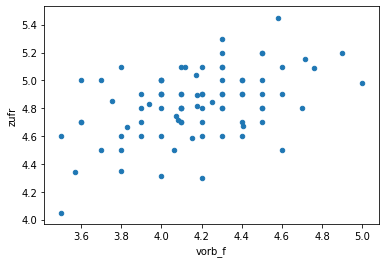

In [308]:
df_total.plot(kind='scatter', x='vorb_f', y='zufr')

Nicht alle Schulen, die bei fachlicher Vorbereitung gut abschneiden, haben auch die Zusammenarbeitsfähigkeiten gefördert.

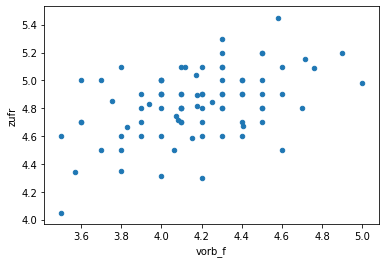

In [312]:
df_total.plot(kind='scatter', x='vorb_f', y='zufr')

Was ist Schülern wichtig? Die deutlichste Korrelation besteht zwischen Zufriedenheit und guter Persönlichkeitsbildung!

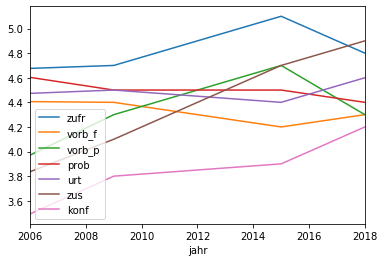

In [313]:
df_total[df_total["name"] == "Im Lee"].plot(x="jahr")

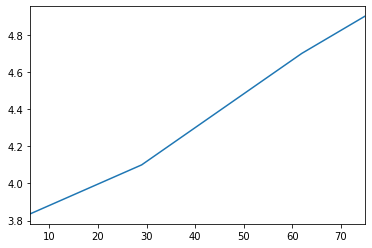

In [314]:
df_total[df_total["name"] == "Im Lee"]["zus"].plot(x="jahr")

Da ist über die Jahre was passiert im Punkt Zusammenarbeit.

Und so findet man die Spitzenreiter für bestimmte Werte über alle Jahre:

In [315]:
df_total.groupby("name").mean()["zufr"].sort_values(ascending=False).round(1)

name
Küsnacht                         5.0
Zürcher Unterland                5.0
Liceo Artistico                  5.0
Gymnasium Unterstrass            5.0
Hohe Promenade                   5.0
Rämibühl RG                      4.9
Limmattal                        4.9
KME                              4.9
Zürcher Oberland                 4.9
Büelrain                         4.9
Rämibühl MNG                     4.9
Stadelhofen                      4.8
Freudenberg                      4.8
Rychenberg                       4.8
Im Lee                           4.8
Glattal                          4.8
Oerlikon                         4.8
Zürich Nord                      4.8
Rämibühl LG                      4.7
Enge                             4.7
Wiedikon                         4.6
Katholisches Gymnasium Zürich    4.6
Freies Gymnasium Zürich          4.6
Hottingen                        4.6
Zürich Birch                     4.5
Uster                            4.4
Name: zufr, dtype: float64

Hier wird man am besten fachlich vorbereitet:

In [316]:
df_total.groupby("name").mean()["vorb_f"].sort_values(ascending=False).round(1)

name
Rämibühl MNG                     4.8
Limmattal                        4.6
Hohe Promenade                   4.5
Zürcher Unterland                4.4
Im Lee                           4.3
Freudenberg                      4.3
Katholisches Gymnasium Zürich    4.3
Zürcher Oberland                 4.3
Rychenberg                       4.3
Uster                            4.2
Büelrain                         4.2
KME                              4.2
Zürich Birch                     4.2
Liceo Artistico                  4.1
Zürich Nord                      4.1
Glattal                          4.1
Rämibühl RG                      4.1
Enge                             4.0
Oerlikon                         4.0
Küsnacht                         4.0
Wiedikon                         3.9
Rämibühl LG                      3.9
Hottingen                        3.8
Stadelhofen                      3.8
Gymnasium Unterstrass            3.6
Freies Gymnasium Zürich          3.5
Name: vorb_f, dtype: float64

Hier sind die Persönlichkeitsbildungsmeister:

In [317]:
df_total.groupby("name").mean()["vorb_p"].sort_values(ascending=False).round(1)

name
Liceo Artistico                  4.9
Gymnasium Unterstrass            4.8
Küsnacht                         4.8
Hohe Promenade                   4.7
Zürich Birch                     4.6
KME                              4.5
Stadelhofen                      4.4
Rämibühl RG                      4.4
Büelrain                         4.3
Zürcher Oberland                 4.3
Rämibühl LG                      4.3
Im Lee                           4.3
Zürcher Unterland                4.3
Freudenberg                      4.3
Rychenberg                       4.3
Rämibühl MNG                     4.3
Limmattal                        4.2
Enge                             4.2
Hottingen                        4.2
Zürich Nord                      4.2
Glattal                          4.2
Uster                            4.2
Wiedikon                         4.1
Oerlikon                         4.0
Katholisches Gymnasium Zürich    3.9
Freies Gymnasium Zürich          3.9
Name: vorb_p, dtype: float64

Und hier die Meister beider Kategorien:


In [318]:
df_total["F&P"] = (df_total["vorb_f"]+df_total["vorb_p"])/2
df_total.groupby("name").mean()["F&P"].sort_values(ascending=False).round(1)

name
Hohe Promenade                   4.6
Liceo Artistico                  4.5
Rämibühl MNG                     4.5
Limmattal                        4.4
Zürich Birch                     4.4
Küsnacht                         4.4
Zürcher Unterland                4.4
KME                              4.3
Im Lee                           4.3
Zürcher Oberland                 4.3
Freudenberg                      4.3
Büelrain                         4.3
Rychenberg                       4.3
Rämibühl RG                      4.2
Gymnasium Unterstrass            4.2
Uster                            4.2
Zürich Nord                      4.1
Enge                             4.1
Glattal                          4.1
Stadelhofen                      4.1
Rämibühl LG                      4.1
Katholisches Gymnasium Zürich    4.1
Oerlikon                         4.0
Wiedikon                         4.0
Hottingen                        4.0
Freies Gymnasium Zürich          3.7
Name: F&P, dtype: float64

### Mit Pivot...
können wir jetzt neue dfs erstellen, die uns die Jahresentwicklungen bestimmter Werte für alle Schulen zeigt.
Ale erstes zum Beispiel die Entwicklung der allgemeinen Zufriedenheit:

In [324]:
pd.options.display.max_columns = None

df_pivoted = df_total.pivot(index='jahr', columns='name', values='zufr')

df_pivoted.round(1).to_excel("zufriedenheit_Jahresverlauf.xlsx")

df_pivoted.round(2)

name,Büelrain,Enge,Freies Gymnasium Zürich,Freudenberg,Glattal,Gymnasium Unterstrass,Hohe Promenade,Hottingen,Im Lee,KME,Katholisches Gymnasium Zürich,Küsnacht,Liceo Artistico,Limmattal,Oerlikon,Rychenberg,Rämibühl LG,Rämibühl MNG,Rämibühl RG,Stadelhofen,Uster,Wiedikon,Zürcher Oberland,Zürcher Unterland,Zürich Birch,Zürich Nord
jahr,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,4.82,4.75,NaN,4.32,4.83,NaN,5.09,4.05,4.68,5.04,NaN,5.1,5.45,5.16,4.72,4.59,4.5,4.98,4.67,4.85,NaN,4.34,4.84,4.89,4.35,NaN
2009,4.90,4.80,4.6,4.60,4.70,5.0,4.80,5.00,4.70,4.90,4.6,5.3,4.80,4.90,4.80,4.90,4.7,4.80,4.90,5.00,NaN,4.50,4.90,5.00,4.70,NaN
2015,4.90,4.50,NaN,5.20,NaN,NaN,5.00,4.60,5.10,4.90,NaN,5.1,5.00,4.80,NaN,4.80,5.0,4.50,5.10,4.60,4.6,4.70,4.90,5.20,NaN,4.8
2018,4.90,4.80,NaN,5.20,NaN,NaN,5.10,4.60,4.80,4.90,NaN,4.7,4.80,4.90,NaN,5.00,4.7,5.20,5.10,4.90,4.3,4.90,5.00,5.10,NaN,4.7


Erstaunlich: Bei der Persönlichkeitsbildung machten fast alle Vortschritte!

In [325]:
df_pivoted = df_total.pivot(index='jahr', columns='name', values='vorb_p')

df_pivoted.round(1).to_excel("persoenlichkeit_Jahresverlauf.xlsx")

df_pivoted.round(2)

name,Büelrain,Enge,Freies Gymnasium Zürich,Freudenberg,Glattal,Gymnasium Unterstrass,Hohe Promenade,Hottingen,Im Lee,KME,Katholisches Gymnasium Zürich,Küsnacht,Liceo Artistico,Limmattal,Oerlikon,Rychenberg,Rämibühl LG,Rämibühl MNG,Rämibühl RG,Stadelhofen,Uster,Wiedikon,Zürcher Oberland,Zürcher Unterland,Zürich Birch,Zürich Nord
jahr,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,4.07,3.93,NaN,3.87,4.12,NaN,4.64,3.71,3.97,4.26,NaN,4.52,4.89,4.43,4.0,3.83,4.18,4.51,4.0,4.11,NaN,3.65,4.03,3.92,4.35,NaN
2009,4.40,4.10,3.9,4.10,4.20,4.8,4.50,4.20,4.30,4.40,3.9,4.70,4.40,4.10,4.1,4.50,4.00,4.10,4.3,4.40,NaN,4.10,4.30,4.30,4.80,NaN
2015,4.30,4.20,NaN,4.70,NaN,NaN,4.80,4.40,4.70,4.40,NaN,5.00,5.10,4.20,NaN,4.20,4.60,3.70,4.9,4.30,4.3,4.10,4.50,4.40,NaN,4.3
2018,4.60,4.60,NaN,4.50,NaN,NaN,4.70,4.50,4.30,4.80,NaN,4.80,5.40,4.20,NaN,4.50,4.50,4.70,4.5,4.90,4.0,4.70,4.50,4.60,NaN,4.1


Und die fachliche Vorbereitung:

In [326]:
df_pivoted = df_total.pivot(index='jahr', columns='name', values='vorb_f')

df_pivoted.round(1).to_excel("fachlich_Jahresverlauf.xlsx")

df_pivoted.round(2)

name,Büelrain,Enge,Freies Gymnasium Zürich,Freudenberg,Glattal,Gymnasium Unterstrass,Hohe Promenade,Hottingen,Im Lee,KME,Katholisches Gymnasium Zürich,Küsnacht,Liceo Artistico,Limmattal,Oerlikon,Rychenberg,Rämibühl LG,Rämibühl MNG,Rämibühl RG,Stadelhofen,Uster,Wiedikon,Zürcher Oberland,Zürcher Unterland,Zürich Birch,Zürich Nord
jahr,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,4.18,4.07,NaN,4.0,3.94,NaN,4.76,3.5,4.41,4.17,NaN,4.12,4.58,4.71,4.08,4.15,4.06,5.0,3.83,3.76,NaN,3.57,4.25,4.18,3.8,NaN
2009,4.40,4.20,3.5,4.4,4.20,3.6,4.50,4.0,4.40,4.10,4.3,4.30,3.90,4.60,4.00,4.10,3.60,4.7,4.00,3.70,NaN,3.70,4.20,4.30,4.5,NaN
2015,4.20,3.80,NaN,4.3,NaN,NaN,4.40,3.9,4.20,4.00,NaN,3.80,4.00,4.50,NaN,4.30,4.00,4.6,4.10,3.80,4.2,4.10,4.30,4.50,NaN,4.1
2018,4.00,4.10,NaN,4.5,NaN,NaN,4.30,4.0,4.30,4.50,NaN,3.60,4.10,4.40,NaN,4.50,3.90,4.9,4.30,3.90,4.2,4.30,4.40,4.60,NaN,4.1


Probiere hier noch was neues: **Scatterplotts mit Seaborn**, um Überblick über Korrelationen von Werten zu gewinnen:

In [330]:
import seaborn as sns

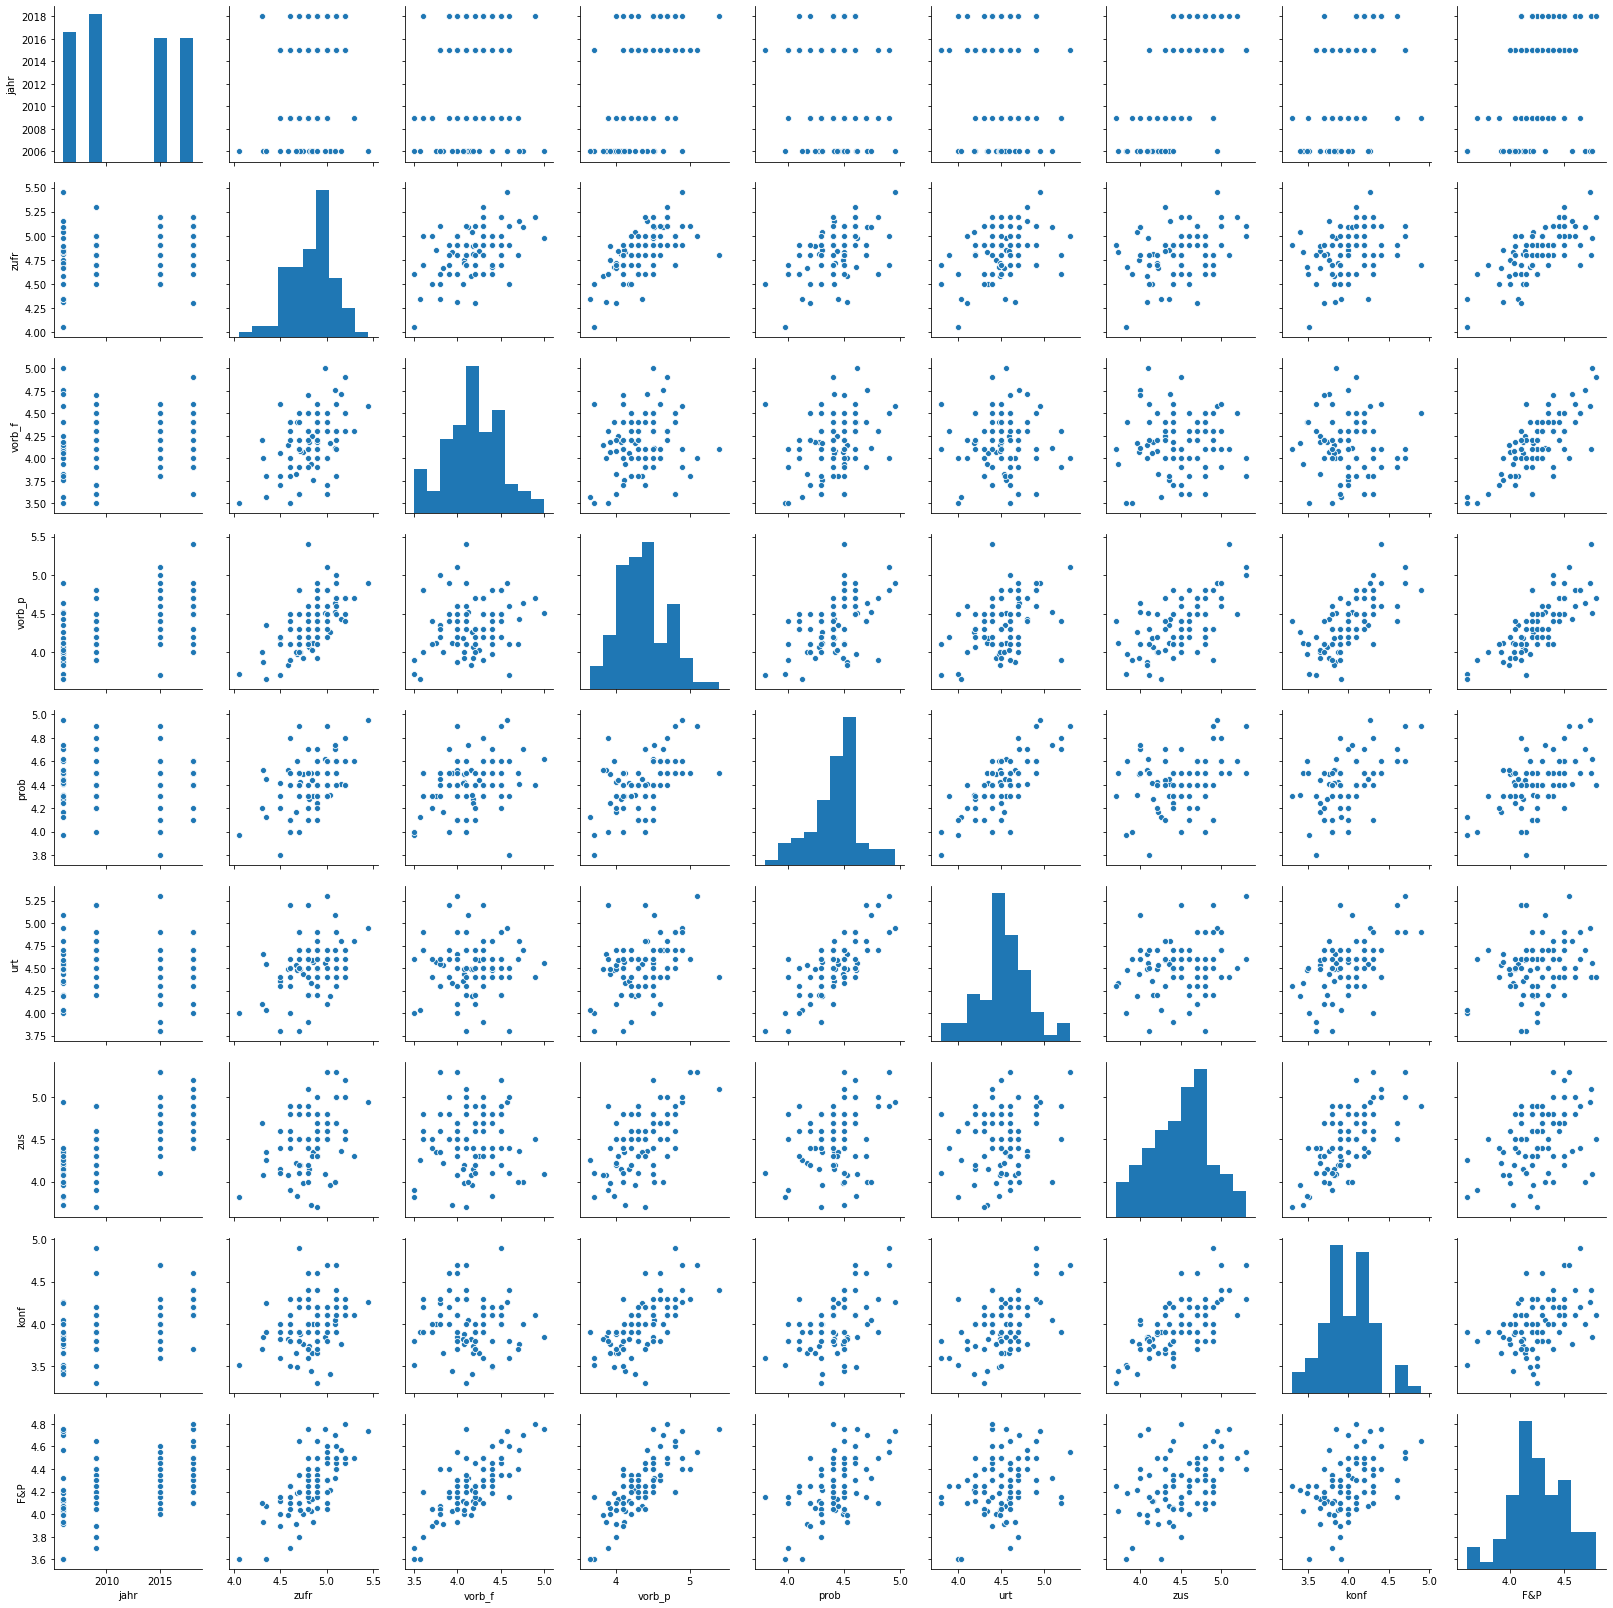

In [331]:
sns.pairplot(df_total)

Hier schauen wir mal nur ein Jahr an (2018):

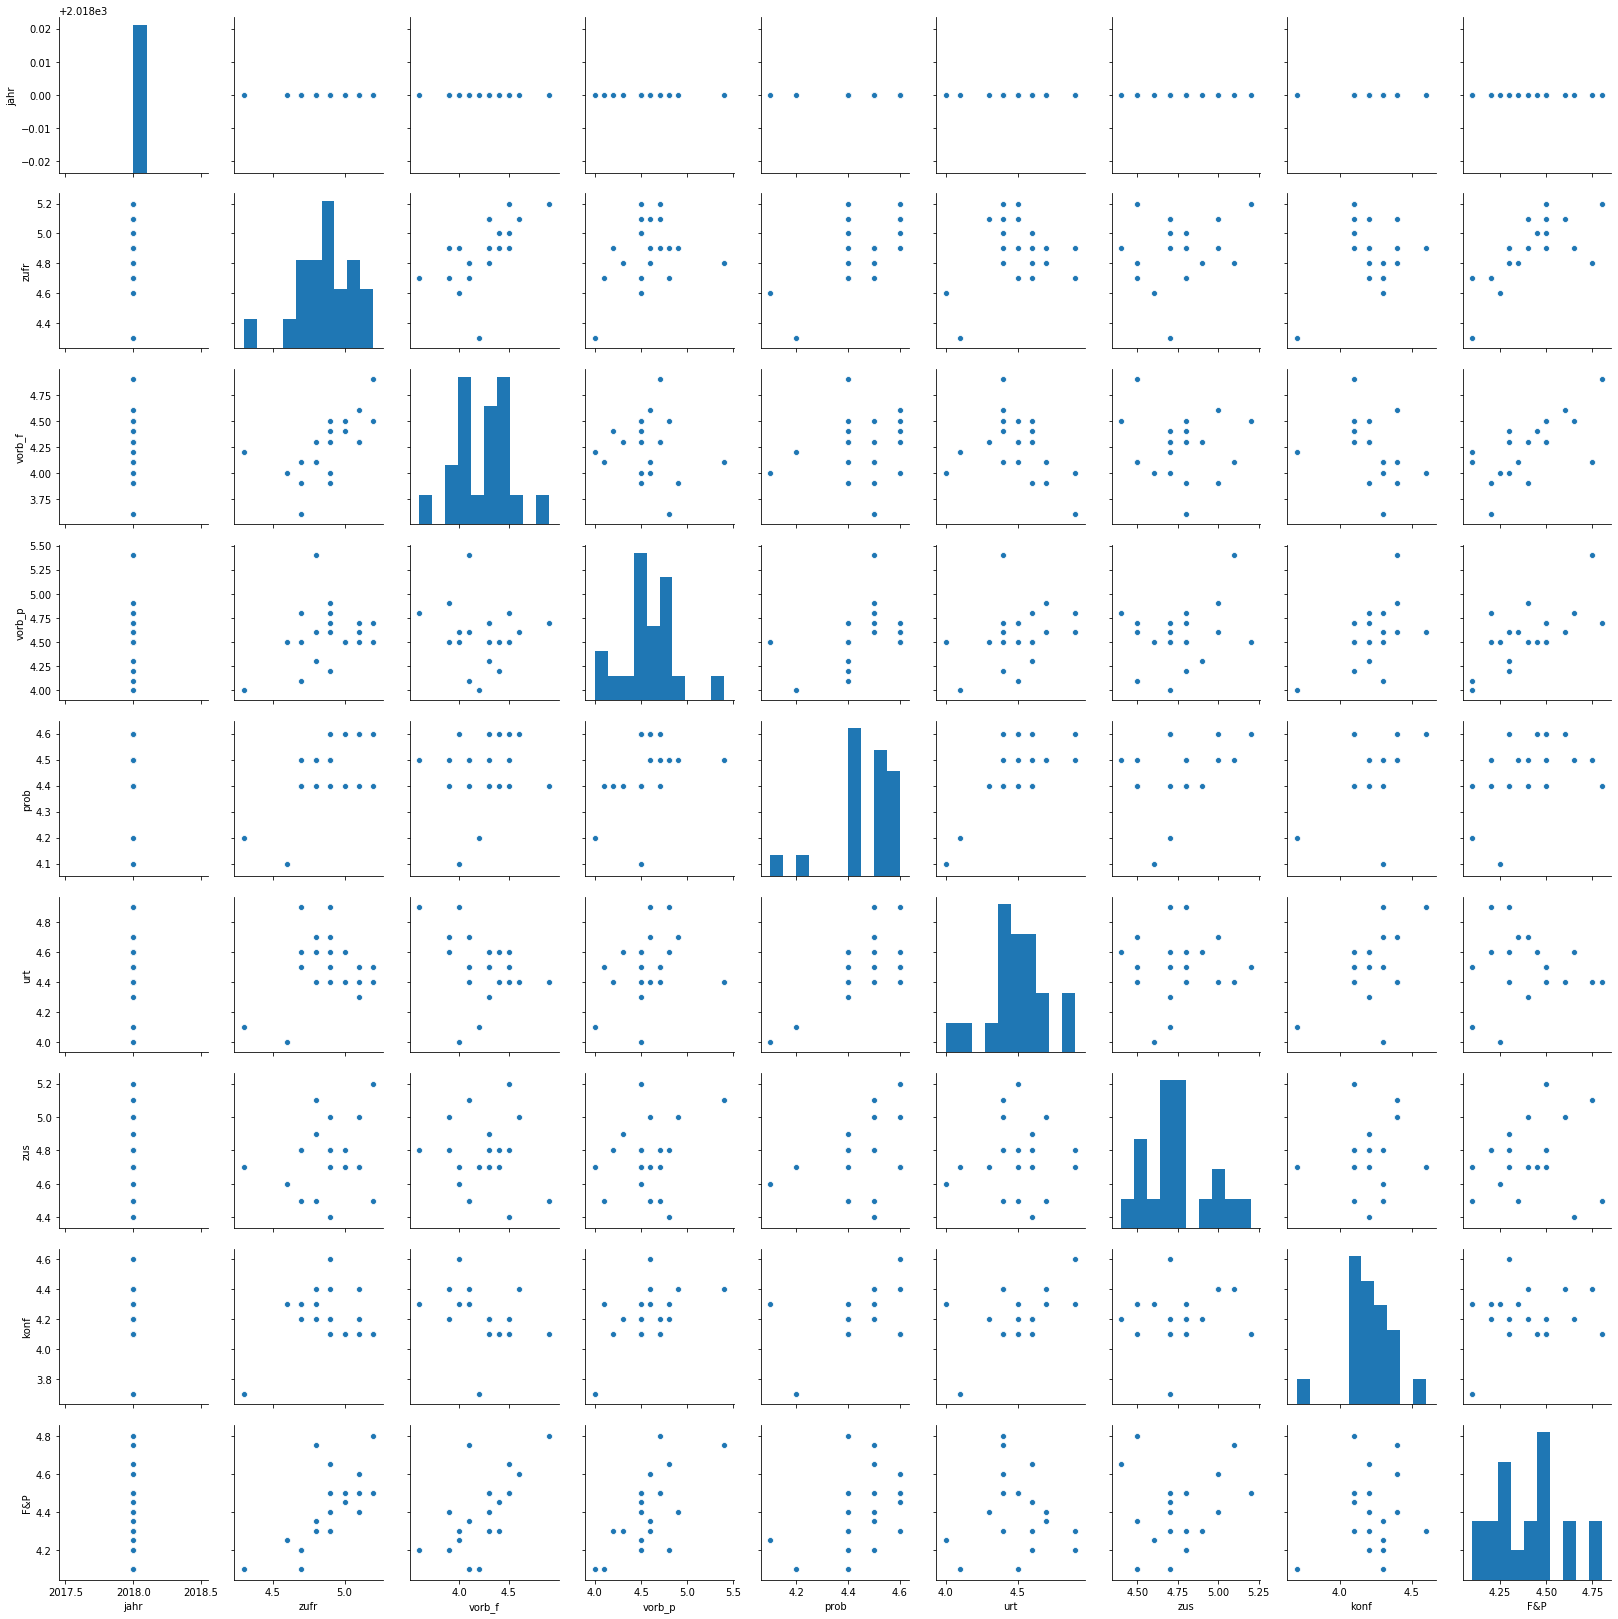

In [332]:
sns.pairplot(df_total[df_total["jahr"]==2018])

!!! Während über die Jahre die Korrelation Zufriedenheit / Persönlich am grössten war, ist es neu jene mit Fachlicher Vorbereitung!

Und hier eine einzelne Schule (z.Bsp. Enge) - gelten da die gleichen Korrelationen?

In [ ]:
sns.pairplot(df_total[df_total["name"]=="Enge"])

### Versuch, Trends für jede Schule zu visualisieren: 

In [334]:
df_pivoted = df_total.pivot(index='jahr', columns='name', values='zufr')
df_pivoted.round(1)

namen = df_pivoted.columns

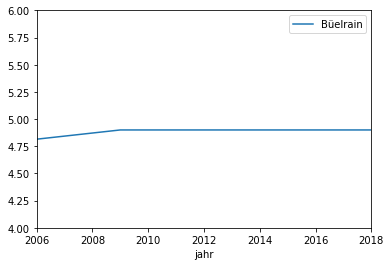

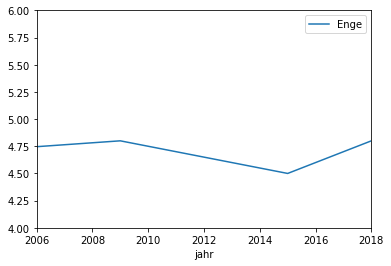

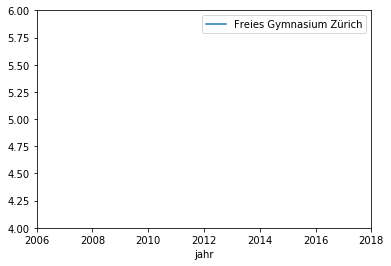

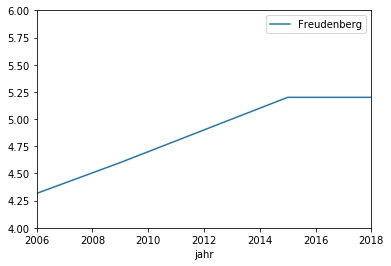

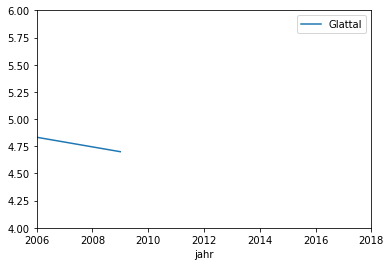

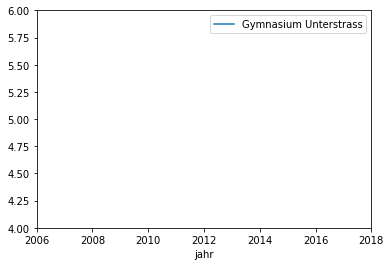

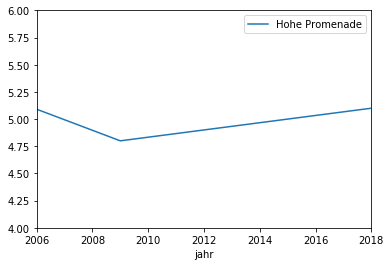

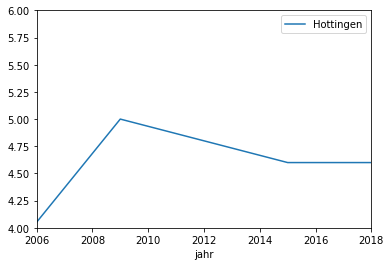

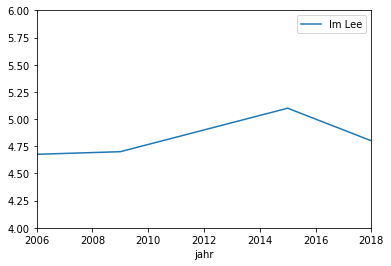

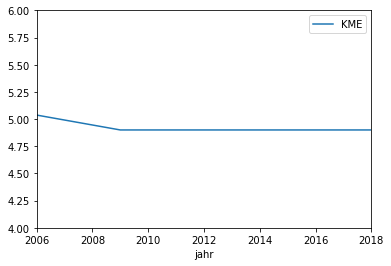

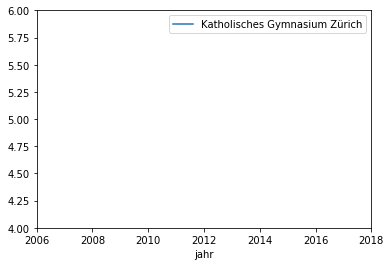

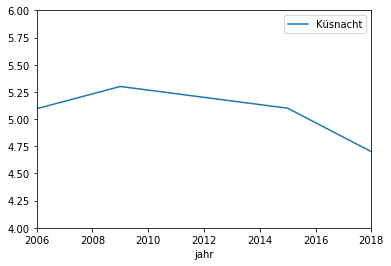

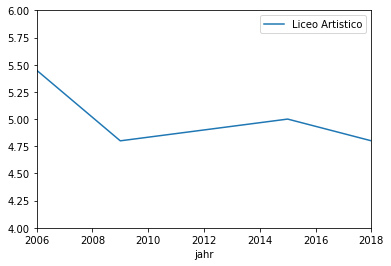

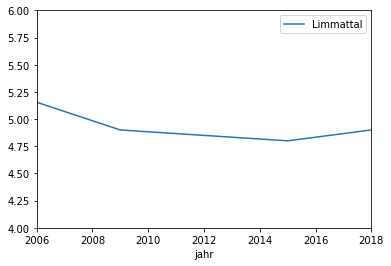

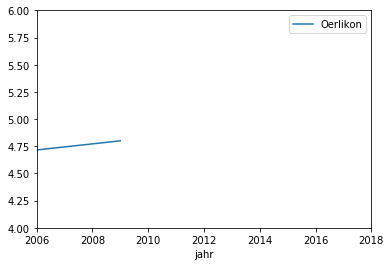

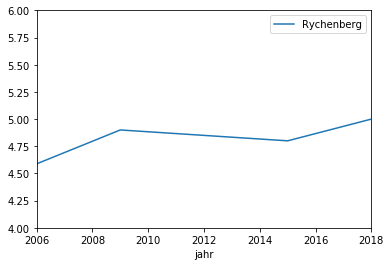

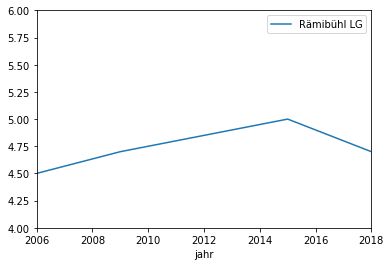

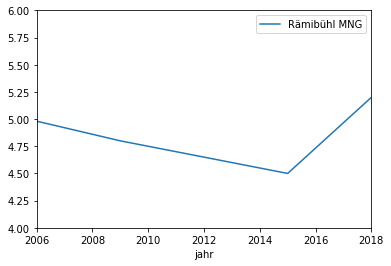

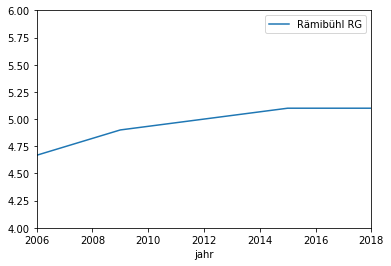

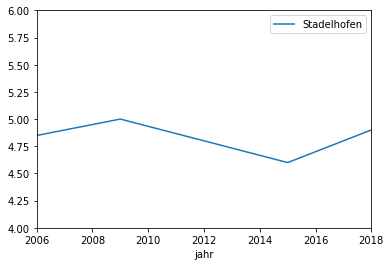

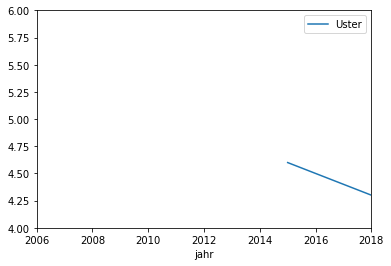

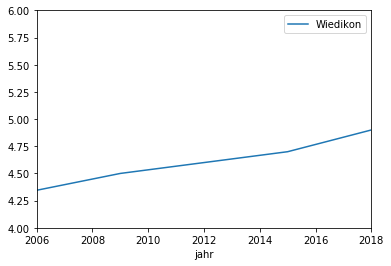

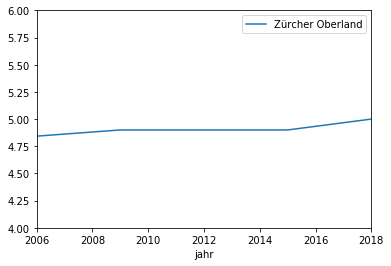

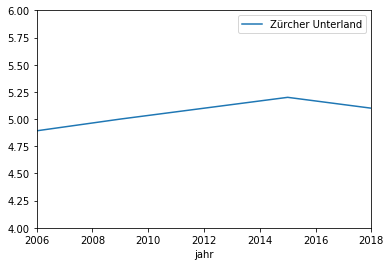

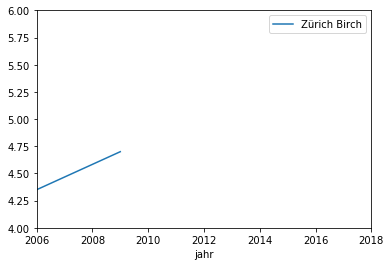

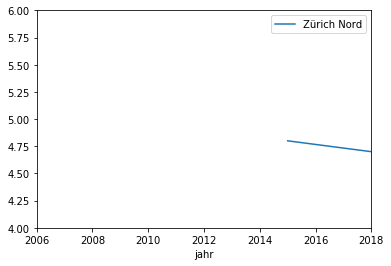

In [335]:
for name in namen: 
    grafik = df_pivoted[name].to_frame().plot()
    grafik.set_ylim(4,6)
    grafik

### Hier eine Abfrage für das Ganze mit einer Trendlinie:

In [336]:
#Eingabe des Wertes, der dragestellt werden soll
variabel = input("Bitte abzufragenden Wert eingeben")

Bitte abzufragenden Wert eingebenzufr


Bitte Nummer der Schule eingeben: 0


'Büelrain'

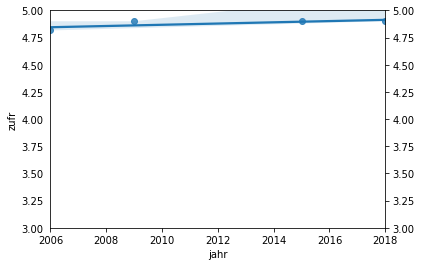

In [337]:
#Hier erstellen wir eine Liste mit allen Schulnamen
df_pivoted = df_total.pivot(index='jahr', columns='name', values='zufr')
df_pivoted.round(1)
namen = df_pivoted.columns

#Eingabe der Schule, die dragestellt werden sollen
schulnummer = input ("Bitte Nummer der Schule eingeben: ")

#Darstellung der entsprechenden Grafik mit Trendlinie
grafik = sns.regplot(df_total[df_total["name"] == namen[int(schulnummer)]]["jahr"],df_total[df_total["name"] == namen[int(schulnummer)]][variabel])
grafik.set_ylim(3,5)
grafik.set_xlim(2006, 2018)
grafik.yaxis.tick_right()
grafik.tick_params(labeltop=False, labelleft=True, labelright=True)
namen[int(schulnummer)]

### Hier werten wir noch zerebrale und soziale Skills aus, indem wir jeweils zweizusammennehmen
(Urteilsfähikeit und Problemlösefähigigkeit, Zusammenarbeit und Konfiltfähigkeit 

In [338]:
df_total["zerebral"] = (df_total["urt"]+df_total["prob"])/2
df_total["sozial"] = (df_total["zus"]+df_total["konf"])/2

In [339]:
#Eingabe des Wertes, der dragestellt werden soll
variabel = input("Bitte abzufragenden Wert eingeben: ")

Bitte abzufragenden Wert eingeben: zerebral


Bitte Nummer der Schule eingeben: 0


'Büelrain'

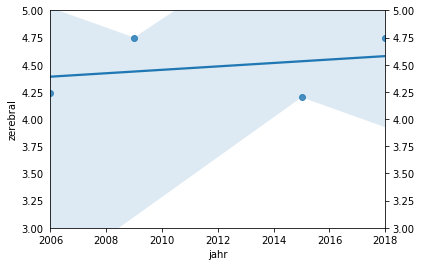

In [340]:
#Hier erstellen wir eine Liste mit allen Schulnamen
df_pivoted = df_total.pivot(index='jahr', columns='name', values='zufr')
df_pivoted.round(1)
namen = df_pivoted.columns

#Eingabe der Schule, die dragestellt werden sollen
schulnummer = input ("Bitte Nummer der Schule eingeben: ")

#Darstellung der entsprechenden Grafik mit Trendlinie
grafik = sns.regplot(df_total[df_total["name"] == namen[int(schulnummer)]]["jahr"],df_total[df_total["name"] == namen[int(schulnummer)]][variabel])
grafik.set_ylim(3,5)
grafik.set_xlim(2006, 2018)
grafik.yaxis.tick_right()
grafik.tick_params(labeltop=False, labelleft=True, labelright=True)
namen[int(schulnummer)]

In [341]:
df_pivoted = df_total.pivot(index='jahr', columns='name', values='zerebral')
df_pivoted.round(2)

name,Büelrain,Enge,Freies Gymnasium Zürich,Freudenberg,Glattal,Gymnasium Unterstrass,Hohe Promenade,Hottingen,Im Lee,KME,Katholisches Gymnasium Zürich,Küsnacht,Liceo Artistico,Limmattal,Oerlikon,Rychenberg,Rämibühl LG,Rämibühl MNG,Rämibühl RG,Stadelhofen,Uster,Wiedikon,Zürcher Oberland,Zürcher Unterland,Zürich Birch,Zürich Nord
jahr,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,4.24,4.46,NaN,4.59,4.42,NaN,4.71,3.99,4.54,4.25,NaN,4.92,4.95,4.61,4.45,4.51,4.38,4.59,4.35,4.43,NaN,4.08,4.51,4.37,4.5,NaN
2009,4.75,4.60,4.3,4.50,4.55,4.6,4.20,4.45,4.50,4.30,5.0,4.70,4.95,4.40,4.50,4.55,4.50,4.55,4.50,4.45,NaN,4.30,4.50,4.50,4.9,NaN
2015,4.20,4.30,NaN,4.75,NaN,NaN,4.55,4.20,4.45,4.20,NaN,4.55,5.10,4.25,NaN,4.10,4.25,3.80,4.75,4.35,4.30,3.90,4.35,4.50,NaN,4.15
2018,4.75,4.60,NaN,4.55,NaN,NaN,4.55,4.05,4.50,4.55,NaN,4.70,4.45,4.40,NaN,4.40,4.50,4.40,4.35,4.60,4.15,4.50,4.60,4.50,NaN,4.45


df_pivoted = df_total.pivot(index='jahr', columns='name', values='sozial')
df_pivoted.round(2)

In [342]:
df_pivoted = df_total.pivot(index='jahr', columns='name', values='konf')
df_pivoted.round(2)

name,Büelrain,Enge,Freies Gymnasium Zürich,Freudenberg,Glattal,Gymnasium Unterstrass,Hohe Promenade,Hottingen,Im Lee,KME,Katholisches Gymnasium Zürich,Küsnacht,Liceo Artistico,Limmattal,Oerlikon,Rychenberg,Rämibühl LG,Rämibühl MNG,Rämibühl RG,Stadelhofen,Uster,Wiedikon,Zürcher Oberland,Zürcher Unterland,Zürich Birch,Zürich Nord
jahr,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,3.74,3.76,NaN,3.84,3.44,NaN,4.0,3.51,3.49,3.41,NaN,4.05,4.26,3.76,3.88,3.82,3.82,3.85,3.65,4.0,NaN,3.91,3.65,3.65,4.25,NaN
2009,4.20,3.70,3.8,3.50,3.90,4.2,4.0,4.10,3.80,3.30,3.9,4.10,4.60,3.80,3.90,3.80,3.90,3.70,4.10,4.0,NaN,3.90,3.90,3.90,4.90,NaN
2015,4.00,4.00,NaN,4.30,NaN,NaN,4.1,4.00,3.90,3.70,NaN,4.30,4.70,4.00,NaN,3.60,3.80,3.60,4.70,4.1,3.8,3.80,4.00,4.20,NaN,4.0
2018,4.60,4.30,NaN,4.10,NaN,NaN,4.1,4.30,4.20,4.20,NaN,4.30,4.40,4.10,NaN,4.10,4.20,4.10,4.20,4.4,3.7,4.20,4.10,4.40,NaN,4.3


### Hier Best und Worst 2018:

In [344]:
df_total[df_total["jahr"]==2018].sort_values("zerebral", ascending=False)

,jahr,name,zufr,vorb_f,vorb_p,prob,urt,zus,konf,F&P,zerebral,sozial
76,2018,Büelrain,4.9,4.0,4.6,4.6,4.9,4.7,4.6,4.30,4.75,4.65
81,2018,Küsnacht,4.7,3.6,4.8,4.5,4.9,4.8,4.3,4.20,4.70,4.55
77,2018,Enge,4.8,4.1,4.6,4.5,4.7,4.5,4.3,4.35,4.60,4.40
68,2018,Stadelhofen,4.9,3.9,4.9,4.5,4.7,5.0,4.4,4.40,4.60,4.70
79,2018,Zürcher Oberland,5.0,4.4,4.5,4.6,4.6,4.7,4.1,4.45,4.60,4.40
70,2018,Freudenberg,5.2,4.5,4.5,4.6,4.5,5.2,4.1,4.50,4.55,4.65
71,2018,Hohe Promenade,5.1,4.3,4.7,4.6,4.5,4.7,4.1,4.50,4.55,4.40
78,2018,KME,4.9,4.5,4.8,4.5,4.6,4.4,4.2,4.65,4.55,4.30
75,2018,Im Lee,4.8,4.3,4.3,4.4,4.6,4.9,4.2,4.30,4.50,4.55
69,2018,Rämibühl LG,4.7,3.9,4.5,4.4,4.6,4.8,4.2,4.20,4.50,4.50
